# Hands-on Activity 9.1 Data Visualization using Pandas and Matplotlib

### Procedures:


*   9.1 Introduction to Matplotlib
*   9.2 Plotting with Pandas
*   9.3 Pandas Plotting Subpackage


### Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single
line.

5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:

  - The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).

  - The second subplot will be a bar plot showing the net effect this had monthly, using resample().

  - Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).

  - Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

In [33]:
import pandas as pd

fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


In [9]:
quakes = pd.read_csv('data/earthquakes.csv')
quakes.head()

,mag,magType,time,place,tsunami,parsed_place
0,1.35,ml,1539475168010,"9km NE of Aguanga, CA",0,California
1,1.29,ml,1539475129610,"9km NE of Aguanga, CA",0,California
2,3.42,ml,1539475062610,"8km NE of Aguanga, CA",0,California
3,0.44,ml,1539474978070,"9km NE of Aguanga, CA",0,California
4,2.16,md,1539474716050,"10km NW of Avenal, CA",0,California


Text(0, 0.5, 'price ($)')

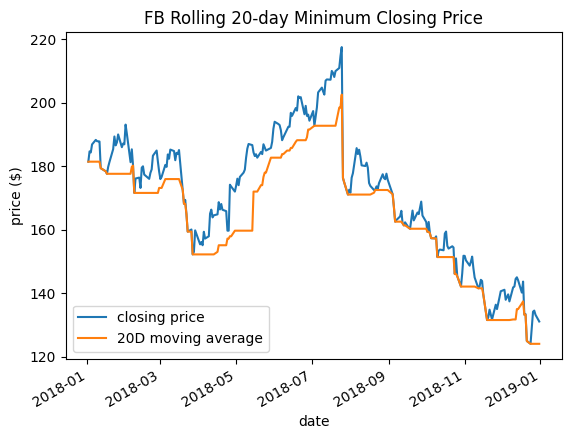

In [2]:
# 1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

import matplotlib.pyplot as plt

fb.assign(
    ma=lambda x: x.close.rolling('20D').min()
).plot(
    y=['close', 'ma'],
    title='FB Rolling 20-day Minimum Closing Price',
    label=['closing price', '20D moving average']
)

plt.legend(loc='lower left')
plt.ylabel('price ($)')

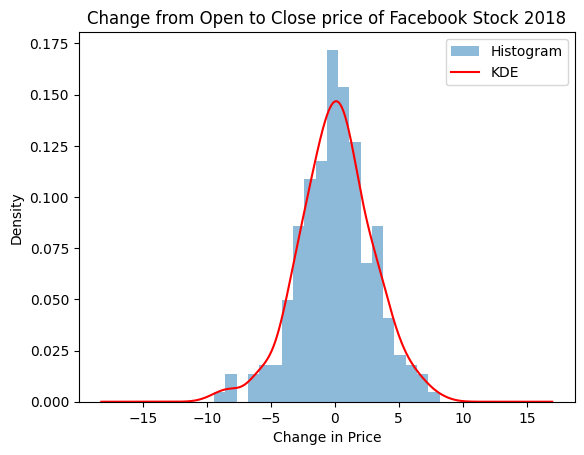

In [7]:
# 2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

import matplotlib.pyplot as plt

fb['change'] = fb['close'] - fb['open']

fb['change'].plot(
    kind='hist',
    density=True,
    bins=20,
    alpha=0.5,
    title='Change from Open to Close price of Facebook Stock 2018'
)
fb['change'].plot(
    kind='kde',
    color='red'
)

plt.xlabel('Change in Price')
plt.legend(['Histogram', 'KDE'])

Text(0.5, 1.0, 'Magnitudes of each magType in Indonesia')

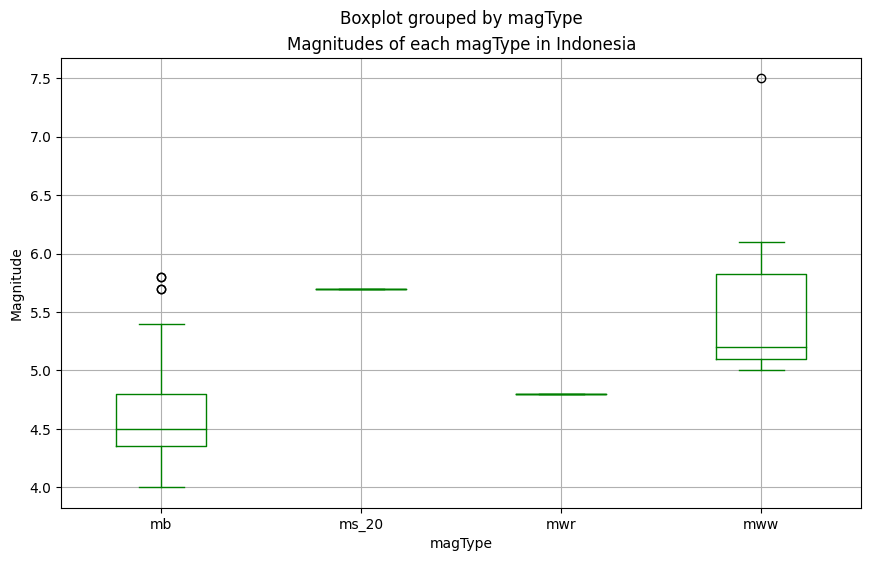

In [21]:
# 3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

quakes.query("parsed_place == 'Indonesia'").boxplot(column='mag', by='magType', figsize=(10, 6), color='green')

plt.ylabel('Magnitude')
plt.xlabel('magType')
plt.title('Magnitudes of each magType in Indonesia')

Text(0.5, 0, 'Date')

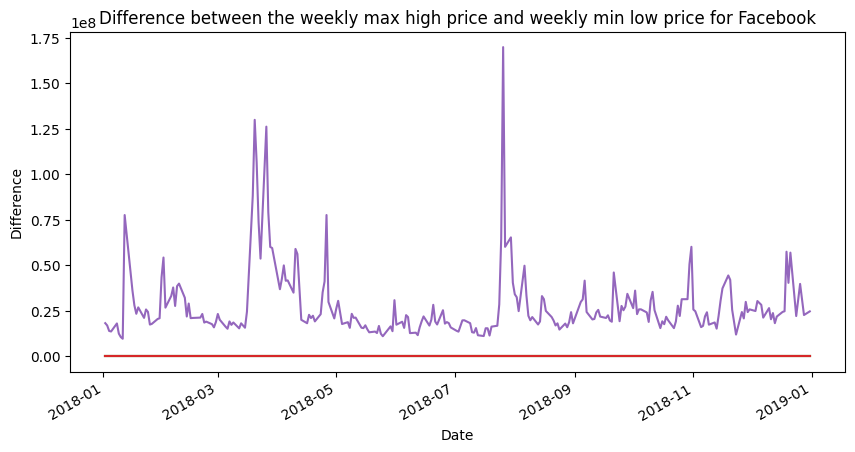

In [42]:
# 4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.

fb.assign(
    week=lambda x: x.high.resample('W').max() - x.low.resample('W').min()
).plot(
    kind='line',
    figsize=(10, 5),
    legend=False,
    title='Difference between the weekly max high price and weekly min low price for Facebook'
)

plt.ylabel('Difference')
plt.xlabel('Date')

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

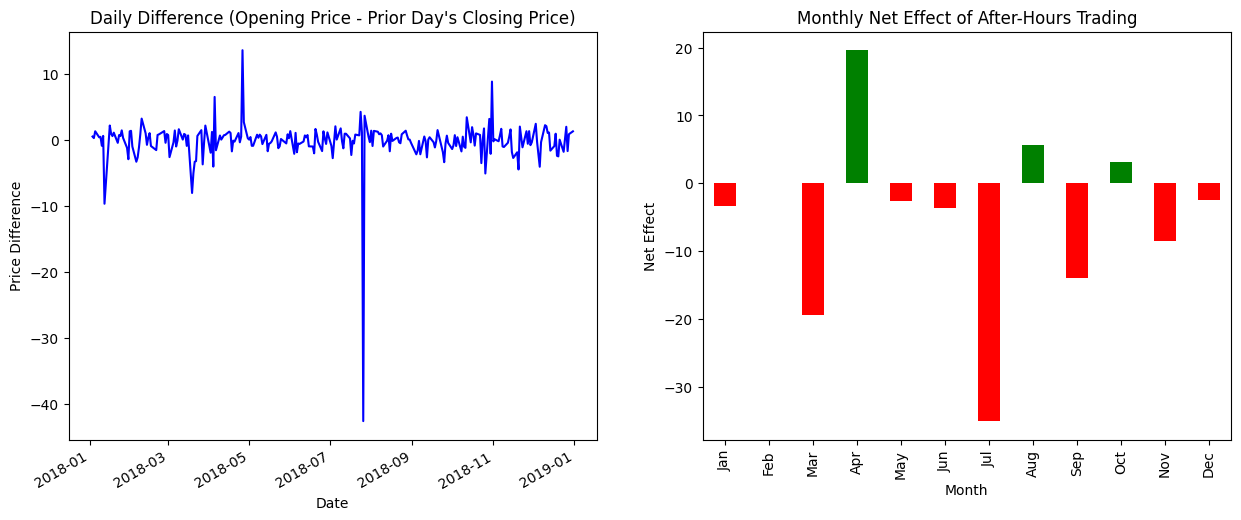

In [48]:
# 5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price
  # The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price
    # (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).
  # The second subplot will be a bar plot showing the net effect this had monthly, using resample().
  # Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).
  # Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.

# creating the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# first subplot (line)
fb['daily_diff'] = fb['open'] - fb['close'].shift(1)
fb['daily_diff'].plot(ax=axes[0], color='blue')
axes[0].set_title("Daily Difference (Opening Price - Prior Day's Closing Price)")
axes[0].set_ylabel('Price Difference')
axes[0].set_xlabel('Date')

# second subplot (bar)
monthly_net = fb.resample('M')['daily_diff'].sum()
colors = ['green' if x >= 0 else 'red' for x in monthly_net] # color condition for the bonus #1
monthly_net.plot(kind='bar', ax=axes[1], color=colors)
axes[1].set_title('Monthly Net Effect of After-Hours Trading')
axes[1].set_ylabel('Net Effect')
axes[1].set_xlabel('Month')

# bonus #2
months = monthly_net.index.month_name().str.slice(stop=3)
axes[1].set_xticklabels(months)

### Summary/Conclusion:



*   In conlusion, this activity helped me practice my knowledge in matplot. I leanred how to visualize data in different ways and customized them in order to represent it accordingly base on the given problem. It was tricky at first but when I went through the given materials, all the information I needed to accomplish each supplementary activity is there for me to use. I still want to further understand data, improve my skills in representing them, and be more familiar in different aggrigation techniques which will be handy when plotting them in a visual way using matplot later on.

